Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import os
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

Pre-processing

In [43]:
train_dir  = '../archive/train'
test_dir = '../archive/test'

tf.random.set_seed(3)

LABELS = np.asarray([file for file in os.listdir(train_dir) if not file.startswith('.')])

print(LABELS)

from keras.utils import image_dataset_from_directory

tf_train_data = image_dataset_from_directory(directory = train_dir,
                                             label_mode = 'binary',
                                             image_size = (64, 64),
                                             shuffle=True)


['REAL' 'FAKE']
Found 100000 files belonging to 2 classes.


2023-10-29 18:30:13.101168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [100000]
	 [[{{node Placeholder/_0}}]]
2023-10-29 18:30:13.101537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [100000]
	 [[{{node Placeholder/_4}}]]


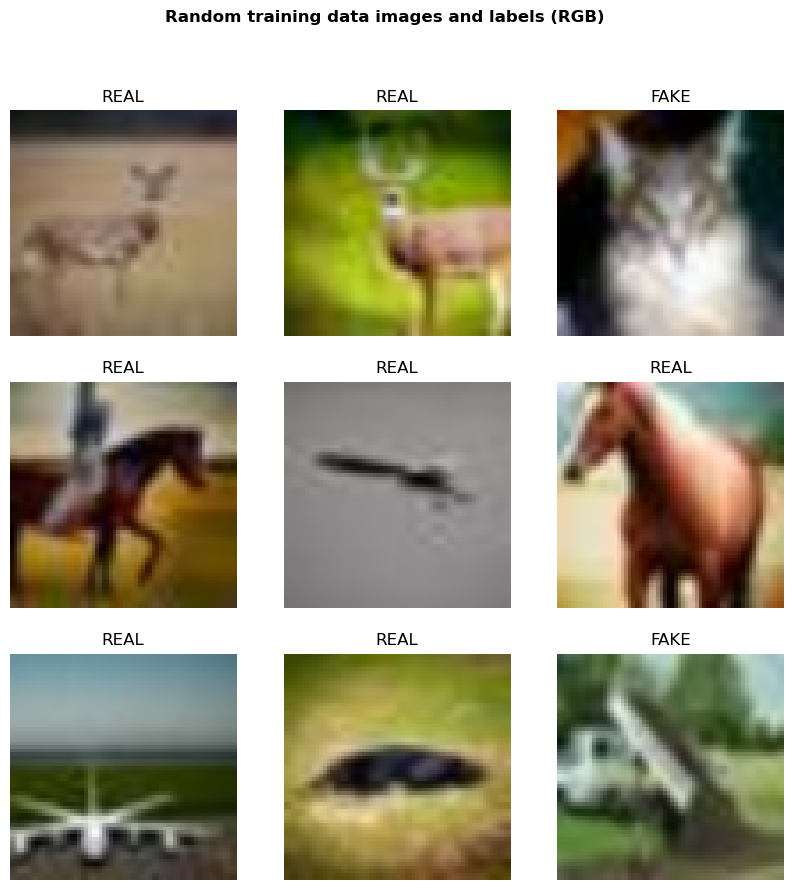

In [44]:
class_names = tf_train_data.class_names

#Plot some random images in the dataset with labels.
plt.figure(figsize=(10, 10))
plt.suptitle('Random training data images and labels (RGB)',
             fontweight = 'bold')

for images,labels in tf_train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = int(labels[i]) 
        plt.title(LABELS[label_index])
        plt.axis("off")

Standardization

Found 100000 images belonging to 2 classes.
Found 100000 images belonging to 2 classes.


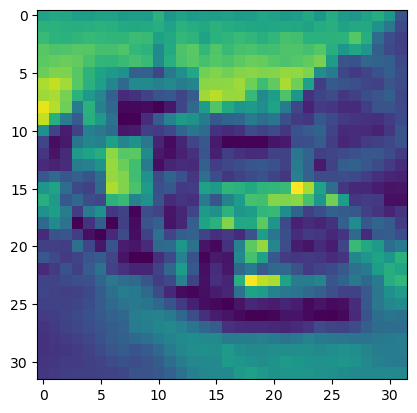

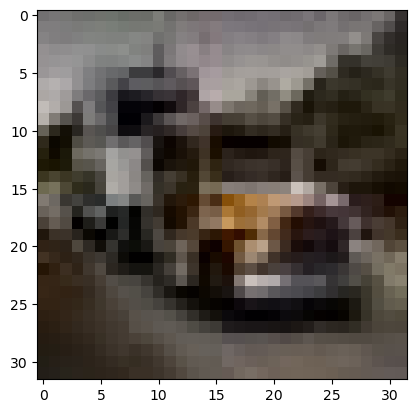

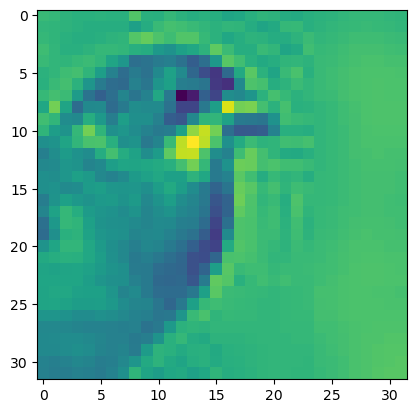

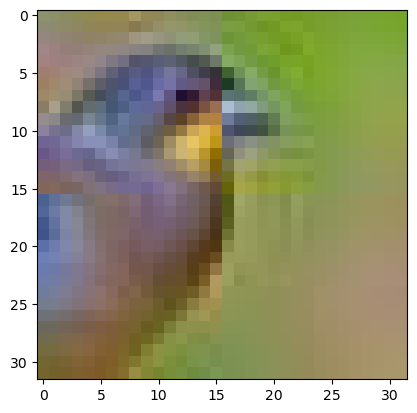

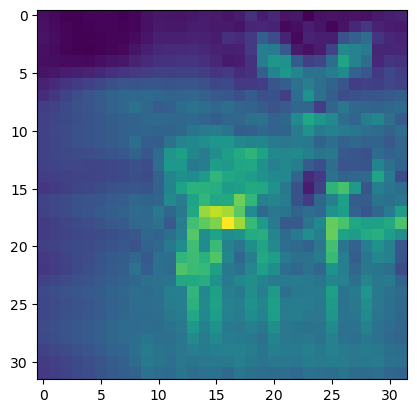

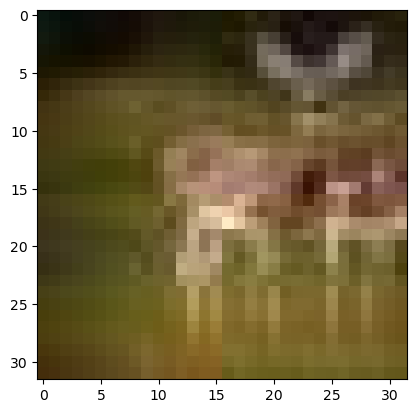

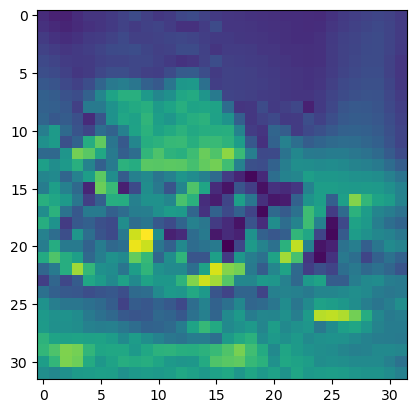

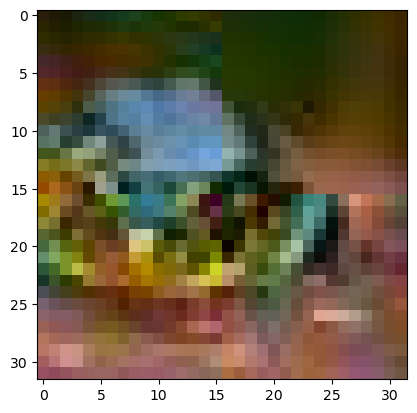

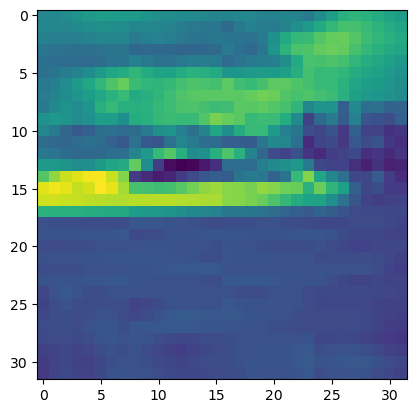

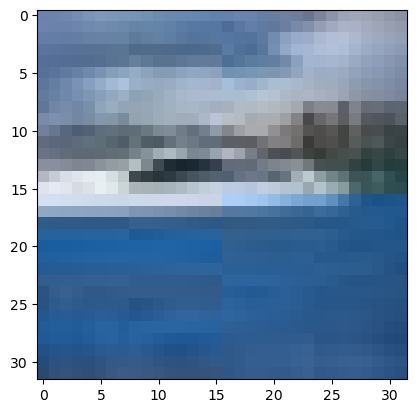

In [37]:
from keras.preprocessing.image import ImageDataGenerator

#No other image augementation.
TRAIN_IMAGE_GENERATOR = ImageDataGenerator(rescale = 1./255)

TEST_IMAGE_GENERATOR = ImageDataGenerator(rescale = 1./255)

TRAIN_GENERATOR_GRAY = TRAIN_IMAGE_GENERATOR.flow_from_directory(
    train_dir,
    target_size = (32, 32),
    class_mode = 'binary',
    color_mode = 'grayscale',
    shuffle = False
)

TRAIN_GENERATOR_RGB = TRAIN_IMAGE_GENERATOR.flow_from_directory(
    train_dir,
    target_size = (32, 32),
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = False
)

for _ in range(5):
    img_gray,label_gray = TRAIN_GENERATOR_GRAY.next()
    img_rgb,label_rgb = TRAIN_GENERATOR_RGB.next()
    plt.imshow(img_gray[0])
    plt.show()
    plt.imshow(img_rgb[0])
    plt.show()
